In [11]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

-0.6535676614428676
['g', 'b', 'r', 'y']


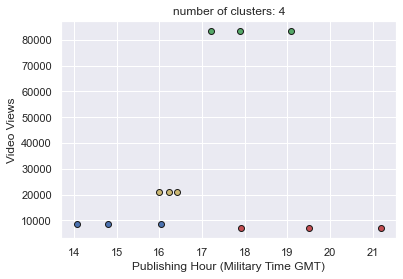

In [33]:
data = pd.read_csv("oldAndNewOnlyEnglish_noDuplicates.csv", engine='python') 
df = pd.DataFrame(data)
hourIdx = df.columns.get_loc('publishedZTimeFloat')
viewIdx = df.columns.get_loc('videoViews')

X=data.iloc[:,[hourIdx,viewIdx]].values
dbscan = DBSCAN(eps=2, min_samples=3).fit(X)
model = dbscan.fit(X)
labels = model.labels_ 

samples_scores = np.zeros_like(labels, dtype=bool) 
samples_scores[dbscan.core_sample_indices_]=True

n_clusters = len(set(labels)) - (1 if -1 in labels else 0) 
print(metrics.silhouette_score(X, labels))

unique_labels = set(labels) 
colors = ['g', 'b', 'r', 'y']
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = X[class_member_mask & samples_scores] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = X[class_member_mask & ~samples_scores] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters) 
plt.xlabel("Publishing Hour (Military Time GMT)")
plt.ylabel("Video Views")
plt.show() 


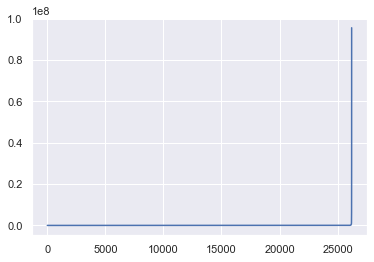

In [34]:

#ignore the below for now
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [35]:
# Compute DBSCAN
db = DBSCAN(eps=2, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 4
Estimated number of noise points: 26203
Silhouette Coefficient: -0.654


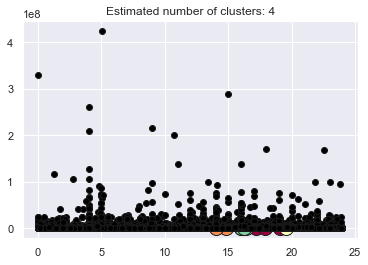

In [36]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
